In [2]:
import networkx as nx

from BiasedInfluenceGraph import *
from WordGenerator import *

$x = B_j - B_i$

DeGroot function
$degroot(x) = x$

Confirmation bias function
$conf(x) = \frac{x(1+ \delta - |x|)}{1+\delta}$

Backfire function
$backf(x) = -x^3$

Fanaticism function
$fan(x) = \frac{x}{|x|}$

Insular function
$ins(x) = 0$


In [3]:
def conf(G, e):
    delta = 0.1
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return x*(1 + delta - abs(x))/(1+delta)

def degroot(G,e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return x

def backf(G,e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return -(x ** 3)

def fan(G,e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return 0 if x == 0 else x/abs(x)

def ins(G,e):
    return 0 

def prueb(G,e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return 0.5 * x

{'a': (1, 2), 'b': (2, 1), 'c': (2, 3), 'd': (3, 2)}
[[0, 0.5, 1], [0, 0.28181818181818175, 1], [0.16769346356123213, 0.28181818181818175, 1], [0.16769346356123213, 0.48124718256949656, 1], [0.16769346356123213, 0.48124718256949656, 0.7807100992134774], [0.16769346356123213, 0.30190670532936764, 0.7807100992134774], [0.26196355205507726, 0.30190670532936764, 0.7807100992134774], [0.26196355205507726, 0.5182201913494249, 0.7807100992134774], [0.26196355205507726, 0.5182201913494249, 0.6208279559989472], [0.26196355205507726, 0.3609730364102619, 0.6208279559989472], [0.33404177372665805, 0.3609730364102619, 0.6208279559989472], [0.33404177372665805, 0.5197481871834341, 0.6208279559989472], [0.33404177372665805, 0.5197481871834341, 0.5473947734292985], [0.33404177372665805, 0.3962644178718162, 0.5473947734292985], [0.38100413817411916, 0.3962644178718162, 0.5473947734292985], [0.38100413817411916, 0.5005575136843977, 0.5473947734292985], [0.38100413817411916, 0.5005575136843977, 0.5115204

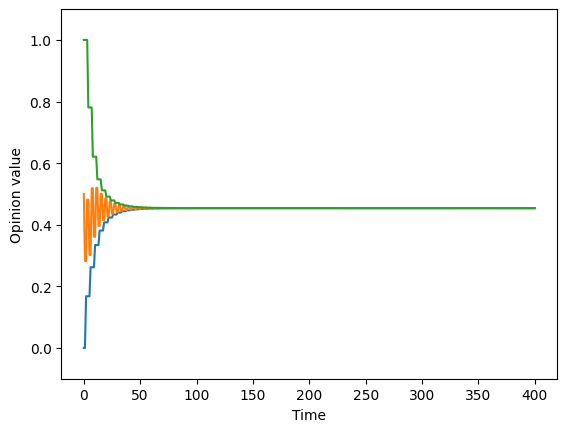

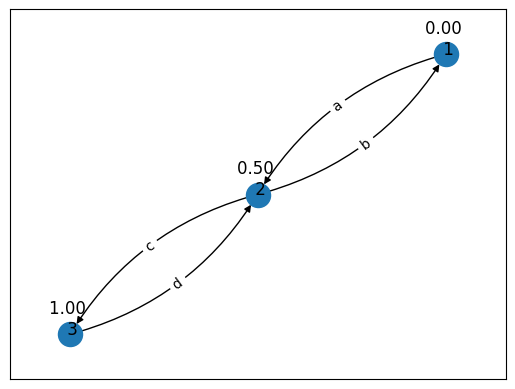

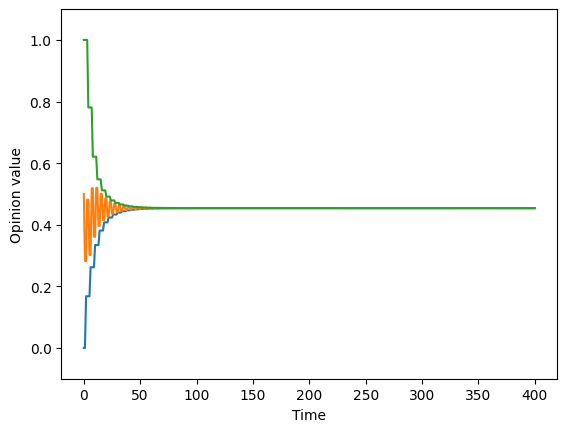

In [11]:
# Fig 1b. Introductory example

A = [1,2,3]
E = [(1,2),(2,1),(3,2),(2,3)]
B0 = [0,0.5,1]
graph = nx.DiGraph()

def influence_one(G,e):
    return 0.8

graph.add_nodes_from(A)
graph.add_edges_from(E)

G = BiasedInfluenceGraph(len(A), ops=B0, G=graph, influence_fn=influence_one, bias_fn=conf)
G.draw()
print(G.labels)

w = "abdc"*100
G.execute_word(w)

print(G.history)

G.plot_opinion_evolution()

True


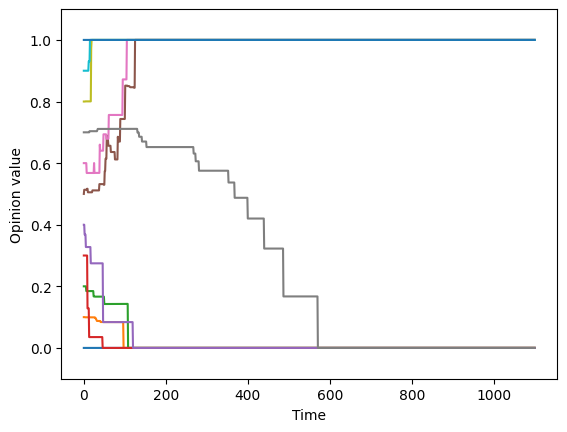

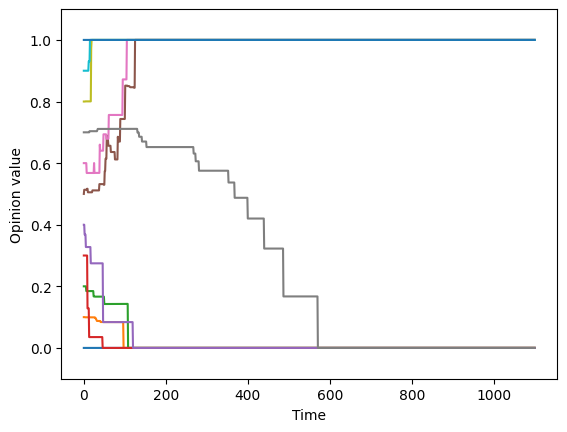

In [9]:
# Fig 1c. Random Erdos-Renyi graph
n = 11
p = 0.3
B0 = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0,bias_fn=backf)

word_len = 100*n
w = generate_random_word(G, word_len)
G.execute_word(w)

print(nx.is_strongly_connected(G))

G.plot_opinion_evolution()

{'a': (1, 2), 'b': (2, 1), 'c': (2, 3), 'd': (3, 2), 'e': (3, 4), 'f': (4, 3)}


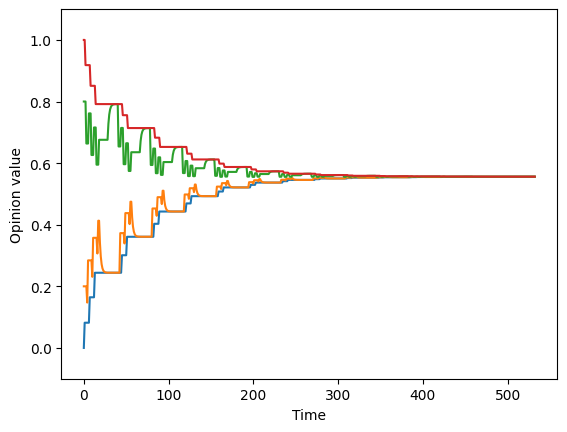

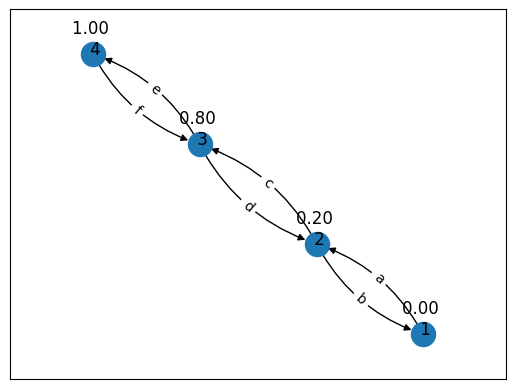

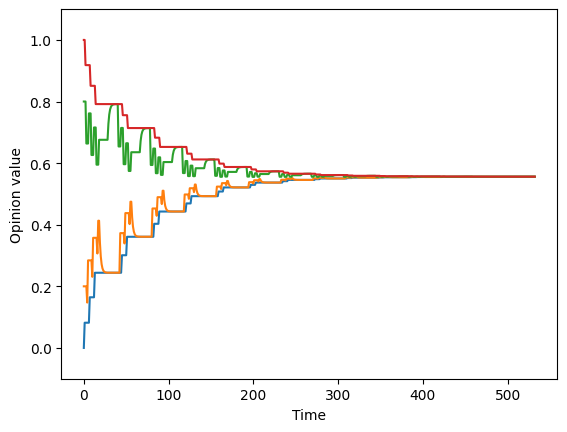

In [8]:
# Figure 4b. 1-BF counterexample
iterations = 500

A = [1,2,3,4]
E = [(1,2), (2,1),(2,3), (3,2), (3,4), (4,3)]

g = nx.DiGraph()
g.add_nodes_from(A)
g.add_edges_from(E)

G = BiasedInfluenceGraph(len(A), ops=[0.0,0.2,0.8,1.0], G=g, bias_fn=conf)

G.draw()
print(G.labels)

U = 0.8
L = 0.2

word = []
fair_window = 'becadf'
v = (fair_window*3 + 'a'*10 + 'f'*10)
while len(word) < iterations:
    G.execute_word(v)
    word += v

G.plot_opinion_evolution()

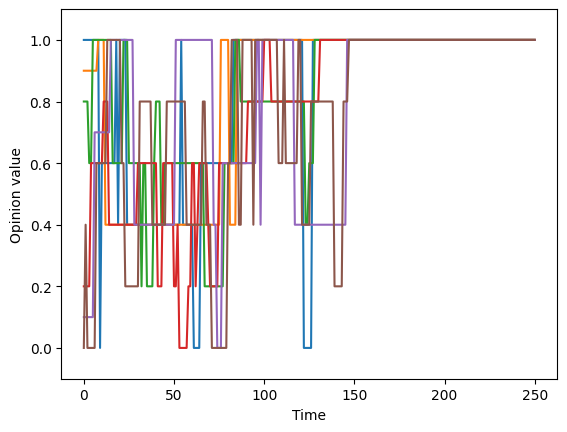

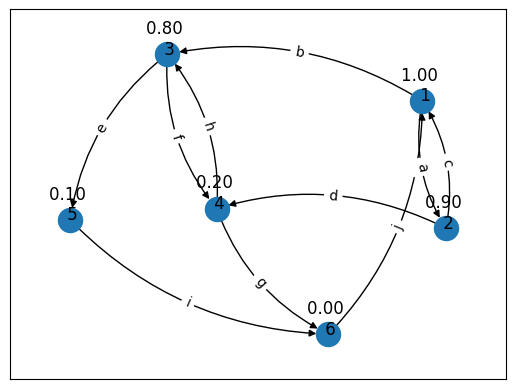

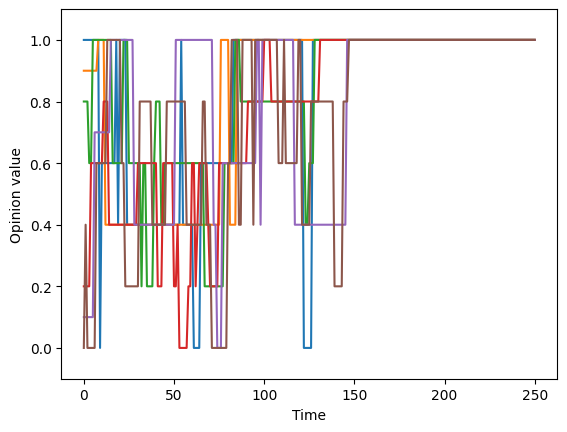

In [83]:
A = [1,2,3,4,5,6]
E = [(1,2),(2,1),(1,3),(2,4),(4,6),(6,1),(3,5),(5,6),(3,4),(4,3)]
ops = [1,0.9,0.8,0.2,0.1,0]
n = len(A)

g = nx.DiGraph()
g.add_nodes_from(A)
g.add_edges_from(E)

def influence(G,e):
    u,v = e
    if(u == 1) and  (v == 2):
        return 0.6
    elif(u == 2) and (v == 1):
        return 0.6
    elif(u == 2) and (v == 4):
        return 0.4
    elif(u == 4) and (v == 6):
        return 0.4
    elif(u == 1) and (v == 3):
        return 0.4
    elif(u == 3) and (v == 5):
        return 0.6
    elif(u == 5) and (v == 6):
        return 0.6
    elif(u == 3) and (v == 4):
        return 0.2
    elif(u == 4) and (v == 3):
        return 0.2
    elif(u == 6) and (v == 1):
        return 1

G = BiasedInfluenceGraph(len(A), ops=ops, G=g, influence_fn=influence, bias_fn=fan)

G.draw()
word_len = 250
w = generate_random_word(G, word_len)
G.execute_word(w)


G.plot_opinion_evolution()


{'a': (0, 1), 'b': (1, 0), 'c': (1, 2), 'd': (2, 1)}


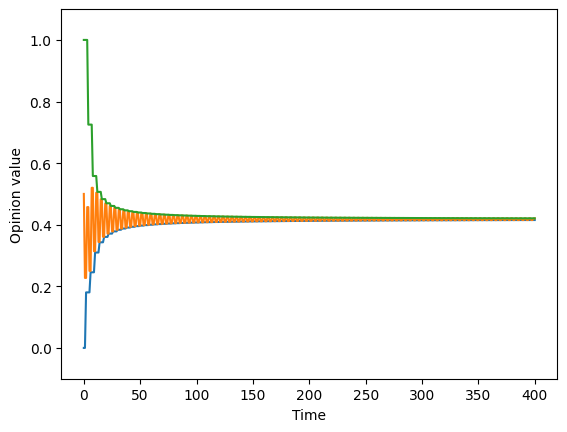

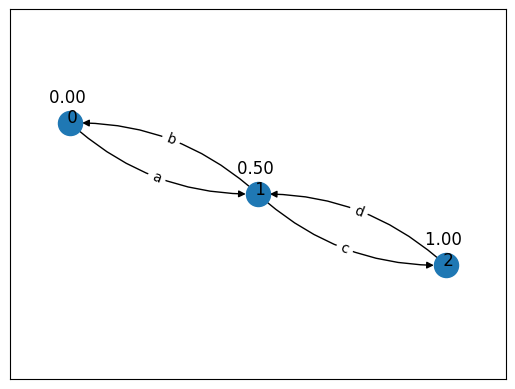

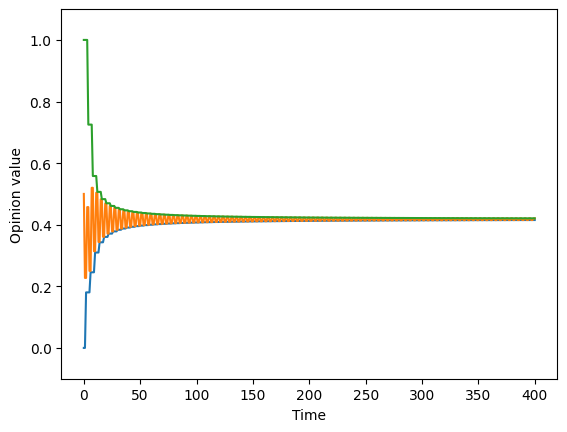

In [ ]:
# Fig 2c: puppets counter example

g = nx.DiGraph([(0,1),(1,0),(2,1),(1,2)])

puppet_influence = lambda g,e: 1

G = BiasedInfluenceGraph(4, ops=[0,0.5,1], G=g, influence_fn=puppet_influence, bias_fn=conf)
nodes = 3

G.draw()

w = "abdc"*100
G.execute_word(w)

G.plot_opinion_evolution()